In [129]:
 # import libraries
import numpy as  np
import pandas as pd
import  array
import matplotlib.pyplot as plt
import importlib.util
from matplotlib.colors import ListedColormap
import array
import sklearn
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
import warnings
import csv
warnings.filterwarnings('ignore')

In [130]:
# importing template file 
spec = importlib.util.spec_from_file_location("Template", "template.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
log_template = foo.Template()

In [131]:
# importing datasets
dataset = pd.read_csv('Social_Network_Ads.csv')

In [132]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [133]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 400 rows and 5 Columns


In [134]:
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
124,15678168,Female,41,51000,0


In [135]:
# checking information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [136]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [137]:
# checking null values in dataset
dataset.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [138]:
# check for minimum dataset
dataset.min()

User ID            15566689
Gender               Female
Age                      18
EstimatedSalary       15000
Purchased                 0
dtype: object

In [139]:
# # split dataset into train and test set
train,test  =  log_template.split_datasets(dataset,0.20)
train.shape,test.shape

((320, 5), (80, 5))

In [140]:
# saving train data in csv file
train_csv  =  log_template.save_csv(train,'CSV_Files/train.csv')

In [141]:
# saving test data in csv file
test_csv =  log_template.save_csv(test,'CSV_Files/test.csv')

In [142]:
# reading train.csv for further operation on it
train_file  = log_template.read_csv('CSV_Files/train.csv')

In [143]:
# Split train.csv data into Train and cross validation 
train_data,cross_val = log_template.split_datasets(train_file,0.30)

In [144]:
train_data.shape,cross_val.shape

((224, 5), (96, 5))

In [145]:
# saving cross validation data in csv file
cv_file = log_template.save_csv(cross_val,'CSV_Files/cross_validation.csv')

In [146]:
# reading cross validation file
cv_data = log_template.read_csv('CSV_Files/cross_validation.csv')

In [147]:
# seperating features and label from train data
x_train = train_data.iloc[:,[2,3]].values
y_train = train_data.iloc[:,4].values

In [148]:
# seperating features and label from cv data
x_cv = cv_data.iloc[:,[2,3]].values
y_cv = cv_data.iloc[:,4].values

In [149]:
# reshape y column of train data
# y_train =y_train.reshape(-1,1)
x_train.shape,y_train.shape

((224, 2), (224,))

In [150]:
# reshape y column of  cv data
y_cv = y_cv.reshape(-1,1)
x_cv.shape,y_cv.shape

((96, 2), (96, 1))

In [151]:
# perform scaling operation on x train data
x_train,scale_obj = log_template.feature_scaling(x_train)

In [152]:
# perform scaling operation on x_cv of cross validation
x_cv,ss_cv = log_template.feature_scaling(x_cv)

Model Fitted
Model performane on train data:
 [[127  12]
 [ 19  66]]
Model performance on cross validation:
 [[57  7]
 [ 6 26]]
Accuracy on Train: 84.50698264917477
Accuracy on cross validation: 85.15625


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


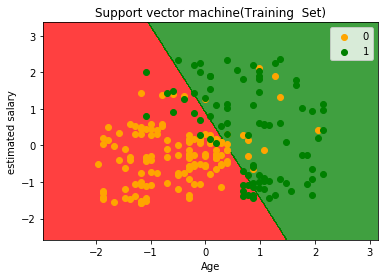

Accuracy Rate for Support Vector Classifier: 0.8366483283961066
Accuracy precision: 74.1835003232062
Accuracy f1_score: 80.98159509202453


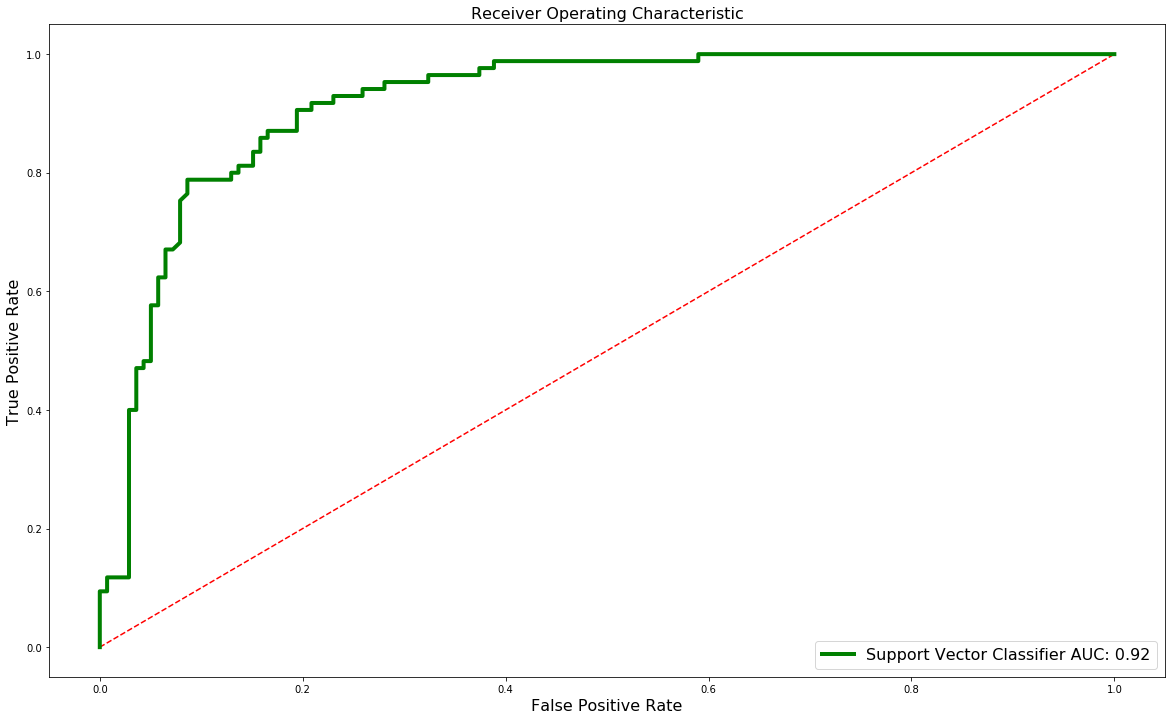

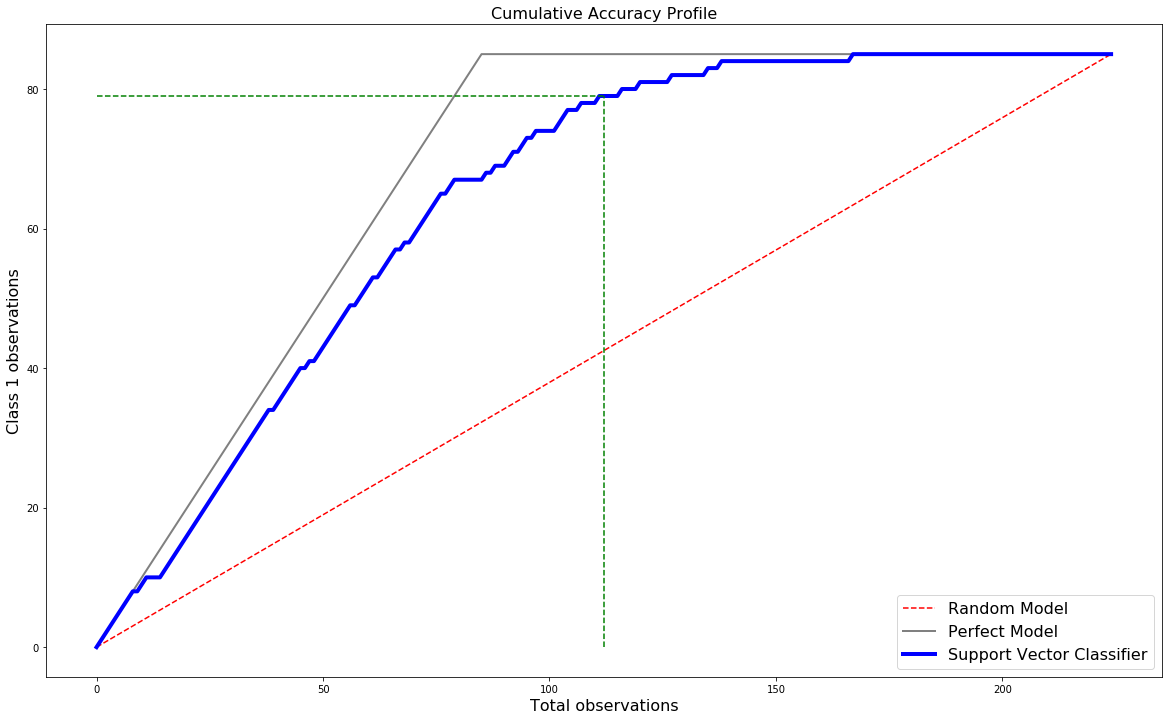

In [156]:
class Training_K_Neighbors():
    
    def fit_model(self,x,y):
        return log_template.Fit_Model_SVM(x,y)
    
    def prediction(self,train,classifier):
        return  log_template.prediction_classifier(train,classifier)
    
    def get_confusion_matrix(self,train,predicted):
        return confusion_matrix(train,predicted)
        
    def get_accuracy(self,y,y_predicted):
        return  sklearn.metrics.balanced_accuracy_score(y,y_predicted)*100
        
    def visualization(self,x,y,classifier):
        x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
        plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('red','green')))
        
        # limit the age and salary         
        plt.xlim(x1.min(),x1.max())
        plt.ylim(x2.min(),x2.max())
       
        # plots all the datapoints in graph         
        for i,j in enumerate(np.unique(y)):
            plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('orange','green'))(i),label=j)

        plt.title('Support vector machine(Training  Set)')
        plt.xlabel('Age')
        plt.ylabel('estimated salary')
        plt.legend()
        plt.show()
        
        
#         visualization of ROC curve
    def visualization_curve(self,x,y,classifier):
        plt.figure(figsize = (20, 12))
        plt.plot([0,1], [0,1], 'r--')
        
        probs = classifier.predict_proba(x)
        # Reading probability of second class (Salary >= $200K)
        probs = probs[:, 1]
        fpr, tpr, thresholds = roc_curve(y, probs)
        roc_auc = auc(fpr, tpr)
        
        label = 'Support Vector Classifier AUC:' + ' {0:.2f}'.format(roc_auc)
        plt.plot(fpr, tpr, c = 'g', label = label, linewidth = 4)
        plt.xlabel('False Positive Rate', fontsize = 16)
        plt.ylabel('True Positive Rate', fontsize = 16)
        plt.title('Receiver Operating Characteristic', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
      
    
#         visualization of CAP curve
    def visualization_CAP_curve(self,x,y,classifier):
        total = len(y)
        class_1_count = np.sum(y)
        class_0_count = total - class_1_count
        plt.figure(figsize = (20, 12))
        
        #  Random Model
        plt.plot([0, total], [0, class_1_count], c = 'r', linestyle = '--', label = 'Random Model')
        
        #  Perfect Model
        plt.plot([0, class_1_count, total], 
                [0, class_1_count, class_1_count], 
                c = 'grey', 
                linewidth = 2, 
                label = 'Perfect Model')
        
        #  Trained Model (Support Vector Classifier)
        probs = classifier.predict_proba(x)
        probs = probs[:, 1]
        model_y = [y for _, y in sorted(zip(probs, y), reverse = True)]
        y_values = np.append([0], np.cumsum(model_y))
        x_values = np.arange(0, total + 1)
        plt.plot(x_values, y_values, c = 'b', label = 'Support Vector Classifier',linewidth = 4)
        
        # Plot information
        plt.xlabel('Total observations', fontsize = 16)
        plt.ylabel('Class 1 observations', fontsize = 16)
        plt.title('Cumulative Accuracy Profile', fontsize = 16)
        plt.legend(loc = 'lower right', fontsize = 16)
        
        
#         CAP Analysis using Area Under Curve

        # Area under Random Model
        area = auc([0, total], [0, class_1_count])
        # Area between Perfect and Random Model
        aP = auc([0, class_1_count, total], [0, class_1_count, class_1_count]) - area
        # Area between Trained and Random Model
        aR = auc(x_values, y_values) - area

        # Accuracy Rate for Support Vector Classifier
        print("Accuracy Rate for Support Vector Classifier: {}".format(aR / aP))
        
        # Point where vertical line will cut trained model
        index = int((50*total / 100))
        ## 50% Verticcal line from x-axis
        plt.plot([index, index], [0, y_values[index]], c ='g', linestyle = '--')
        ## Horizontal line to y-axis from prediction model
        plt.plot([0, index], [y_values[index], y_values[index]], c = 'g', linestyle = '--')
        class_1_observed = y_values[index] * 100 / max(y_values)
      
        


def main():
# instantiation of class
    obj = Training_K_Neighbors()
#     fitting train model
    classifier = obj.fit_model(x_train,y_train)
    print("Model Fitted")
#     prediction over train model by x_train data
    prediction_train = obj.prediction(x_train,classifier)
#     confusion matrix for describe performance of classification model
    train_cf_matrix = obj.get_confusion_matrix(y_train,prediction_train)
    print("Model performane on train data:\n",train_cf_matrix)

#     predict cross validation on model
    prediction_cv =  obj.prediction(x_cv,classifier)
    cv_cf_matrix  = obj.get_confusion_matrix(y_cv,prediction_cv)
    print("Model performance on cross validation:\n",cv_cf_matrix)
    
#     getting accuracy on train data  and cross validation
    train_accuracy = obj.get_accuracy(y_train,prediction_train)
    print("Accuracy on Train:",train_accuracy)
    cv_accuracy = obj.get_accuracy(y_cv,prediction_cv)
    print("Accuracy on cross validation:",cv_accuracy)
    
    # Setting threshold limit where we get accuracy greater than 80%
    # then save our model in pickle file  
    if train_accuracy or cv_accuracy > 80:
        file = open('Pickle File/TrainPickle.pkl', 'wb')
        pickle.dump(classifier,file)
        pickle.dump(scale_obj,file)
        file.close()     

#     visualization of data
    obj.visualization(x_train,y_train,classifier)
    obj.visualization_curve(x_train,y_train,classifier)
    obj.visualization_CAP_curve(x_train,y_train,classifier)
    accuracy_precision = sklearn.metrics.average_precision_score (y_train,prediction_train)*100
    print("Accuracy precision:",accuracy_precision)
    accuracy_f1 = sklearn.metrics.f1_score(y_train,prediction_train)*100
    print("Accuracy f1_score:",accuracy_f1)

if __name__ == '__main__':
    main()